# 03 Linear Models: Linear Regression

Regressive models...

![Linear regression on practice][1]

[1]: https://imgs.xkcd.com/comics/curve_fitting.png
[2]: https://xkcd.com/2048

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
def mse(a, b, prec=2):
    return np.round(mean_squared_error(a, b), prec)

# Generate data

Generating 1d data.

In [3]:
a = 5
b = 10
n_points = 300
x_min = 0.5
x_max = 4

In [4]:
rs = np.random.RandomState(33)
noise = rs.normal(0, 5, (n_points, 1))

X = np.linspace(x_min, x_max, n_points)[:, None]
y = a + b * X + noise

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=33)

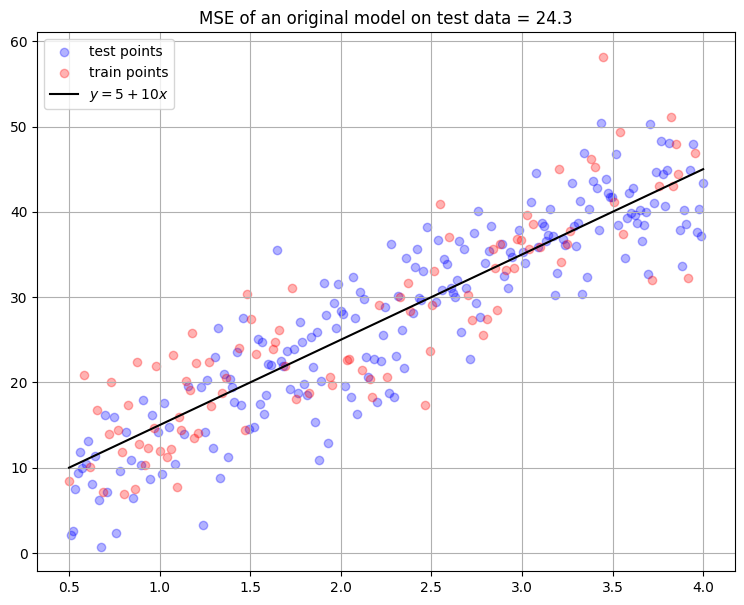

In [7]:
plt.figure(figsize=(9, 7))
plt.scatter(X_test, y_test, c='b', alpha=0.3, label='test points')
plt.scatter(X_train, y_train, c='r', alpha=0.3, label='train points')
plt.plot([0.5, 4], [10, 45], c='black', lw=1.5, label=f'$y = {a}+{b}x$');
plt.grid(True)
plt.legend()
plt.title(f'MSE of an original model on test data = {mse(a+b*X_test, y_test)}')
plt.show()

## Linear Regression Model

$$
y = w_0 + w_1X_1 + w_2 X_2 + \ldots + w_k X_k
$$

In case of $k= 1$, linear model becomes trivial

$$
    y = w_0 + w_1 x, \quad x = X_1.
$$

In [8]:
from sklearn.linear_model import LinearRegression

Train a model.

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Make predictions.

In [10]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

Compute an error.

In [11]:
print('Train MSE:', mse(y_pred_train, y_train),
      'Test MSE:', mse(y_pred_test, y_test))

Train MSE: 29.1 Test MSE: 25.0


Plot predicted model.

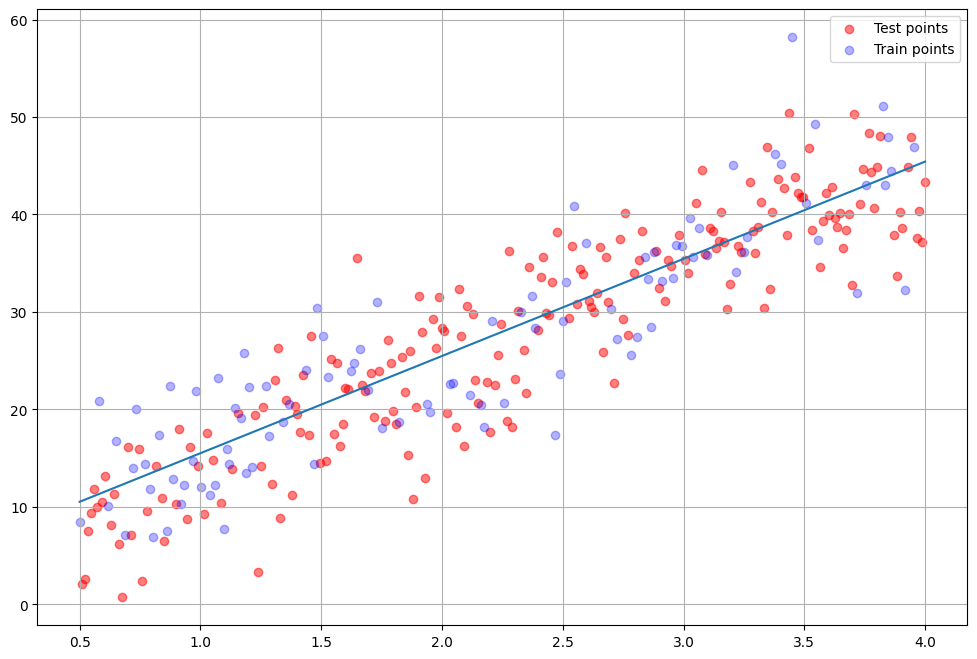

In [12]:
X_linspace = np.linspace(0.5, 4, 200)[:, None]
y_pred_linspace = reg.predict(X_linspace)

plt.figure(figsize=(12, 8))
plt.plot(X_linspace, y_pred_linspace)
plt.scatter(X_test, y_test, alpha=.5, c='r', label='Test points');
plt.scatter(X_train, y_train, alpha=.3, c='b', label='Train points');
plt.legend()
plt.grid(True)
plt.show()

In [13]:
reg.coef_, reg.intercept_

(array([[9.9710629]]), array([5.53745896]))

### What if we add more (redundant) polynomial features, could we do better on train?

$$
y = w_0 + w_1X_1 + w_2 X_2 + \ldots + w_k X_k
$$

Let $k$ to be equal 15, then
$$
    X_1 = x, X_2 = x^2, \ldots, X_{15}=x^{15}, \quad k = 15.
$$

$$
    y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15}.
$$

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [16]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_train = reg.predict(X_train_poly)
y_pred_test = reg.predict(X_test_poly)

print('Train MSE:', mse(y_pred_train, y_train),
      'Test MSE:', mse(y_pred_test, y_test))

Train MSE: 23.21 Test MSE: 30.13


### 1.1 Prediction curve

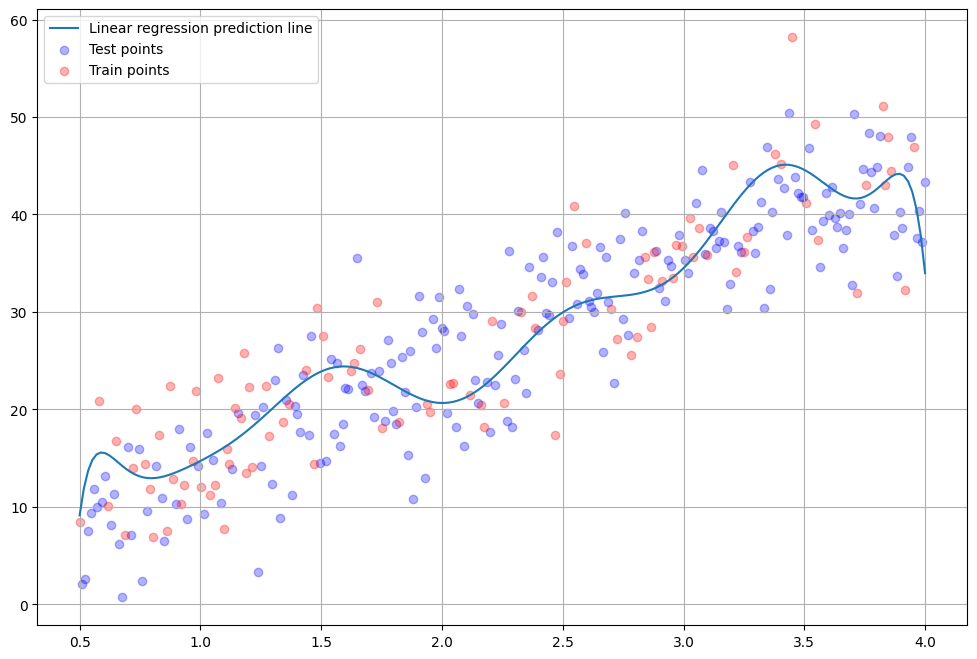

In [17]:
X_linspace_poly = poly.fit_transform(np.linspace(0.5,4,200).reshape(-1,1))
y_pred_linspace = reg.predict(X_linspace_poly)

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0.5,4,200), y_pred_linspace, label='Linear regression prediction line')
plt.scatter(X_test, y_test, alpha=.3,c='b', label = 'Test points');

plt.scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
plt.legend()
plt.grid(True)
plt.show()

In [18]:
reg.coef_

array([[ 4.05380697e+04, -1.36898371e+05,  2.48547753e+05,
        -2.41846058e+05,  6.44451081e+04,  1.47512734e+05,
        -2.32079740e+05,  1.81220706e+05, -9.19231937e+04,
         3.22998512e+04, -7.96766743e+03,  1.35895630e+03,
        -1.52971638e+02,  1.02412482e+01, -3.09228148e-01]])

### 1.2 Error curve

We know that originally data was produce from a linear law, but we are building a model as a polynom of 15th degree:

$$y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15} $$

What if we make some of the coefficients very small (ideally coefficients corresponded to all degrees higher than 1):

- Lasso
- Ridge
- Elastic Net (combination of Lasso and Ridge)


These models share the same idea: if we want to make some coefficient small, let's add their norm to the optimized function, so instead of regular MSE:

$$\sum(y - (w_0 + w_1 x))^2 \rightarrow \min_{\text{w.r. }w_i} $$

let's optimize the following:

$$\left[\sum_{i=1}^{n}(y - (w_0 + w_1 x))^2 + \frac{1}{\alpha}\sum_{j=1}^{k} ||w_i|| \right]\rightarrow \min_{\text{w.r. }w_i} $$

in case of Ridge regression the norm is l2:
$$||w_i|| = ||w_i||_{l_2}  = w_i^2,$$
and in case of Lasso regression the norm is l1:
$$||w_i|| = ||w_i||_{l_1} = |w_i|$$

and $\alpha$ is a regularization coefficient. Smaller values of $\alpha$ correspond to harder regularization.


> Typically, you want to change $\alpha$ on the log-scale, e.g. 0.003, 0.001, 0.03...

In [19]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
test_error = []
train_error = []
weights = []
logspace = np.logspace(-6,1,20)

for alpha in logspace:
    reg = Ridge(fit_intercept=True, alpha=alpha)
    reg.fit(X_train_poly, y_train)
    y_pred_train = reg.predict(X_train_poly)
    y_pred_test = reg.predict(X_test_poly)

    train_error.append(mse(y_pred_train, y_train))
    test_error.append(mse(y_pred_test, y_test))
    weights.append(np.sum(reg.coef_**2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.37536e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58914e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01759e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.2021e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

$$y = w_0 + w_1x + w_2 x^2 + \ldots + w_{15} x^{15} $$


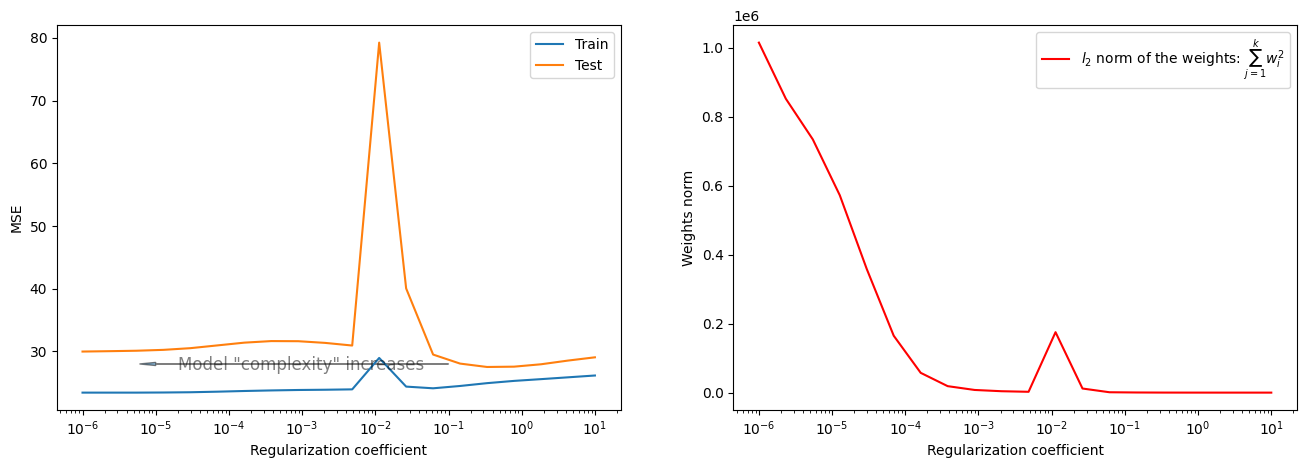

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(logspace, train_error, label='Train')
ax[0].plot(logspace, test_error, label='Test')
ax[0].set_xscale('log')
ax[0].legend();
ax[0].arrow(1e-1, 28, -(1e-1-1e-5), 0, head_width=0.5, head_length=.000004, alpha=.5);
ax[0].annotate('Model "complexity" increases', [2e-5, 27], size=12, alpha=0.5);
ax[0].set_xlabel('Regularization coefficient')
ax[0].set_ylabel('MSE')

ax[1].plot(logspace, weights, color='r', label='$l_2$ norm of the weights: $\sum_{j=1}^{k} w_i^2$')
ax[1].set_xscale('log')
ax[1].legend();
ax[1].set_ylabel('Weights norm')
ax[1].set_xlabel('Regularization coefficient');

In [22]:
np.argmin(test_error), logspace[np.argmin(test_error)]

(15, 0.3359818286283781)

In [23]:
poly = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_linspace_poly = poly.fit_transform(np.linspace(0.5,4,200).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.99076e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


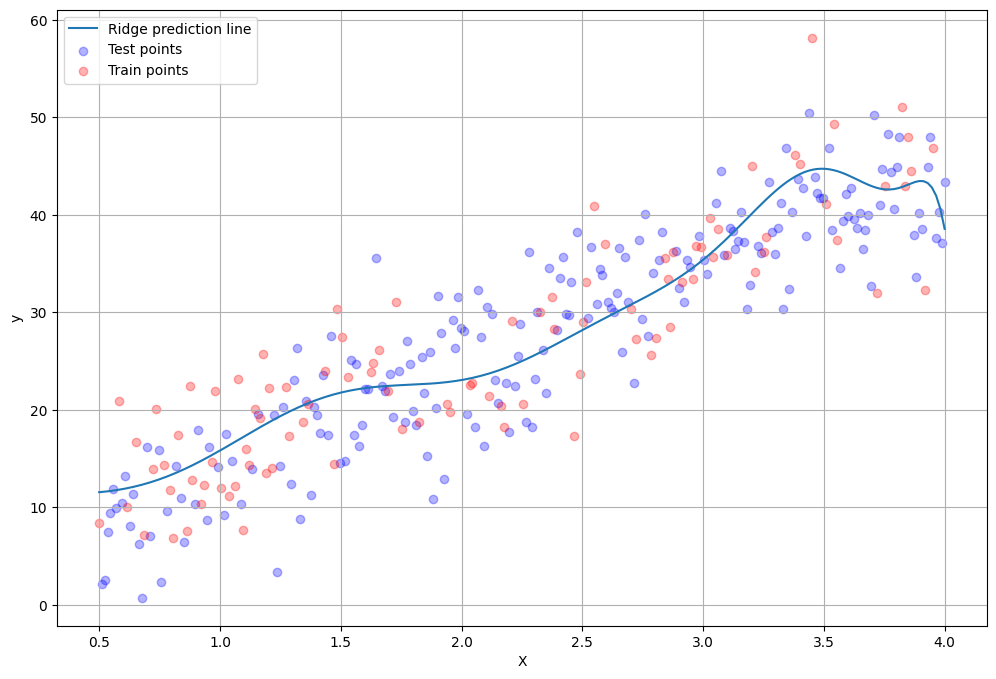

In [24]:
reg = Ridge(alpha = logspace[15], fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0.5,4,200), y_pred_linspace, label='Ridge prediction line')
plt.scatter(X_test, y_test, alpha=.3, c='b', label='Test points');
plt.scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
plt.legend()
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### No a Silver Bullet

We do not get a perfect line, but sometimes it helps, compare to Linear Regression without regularization.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.99076e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


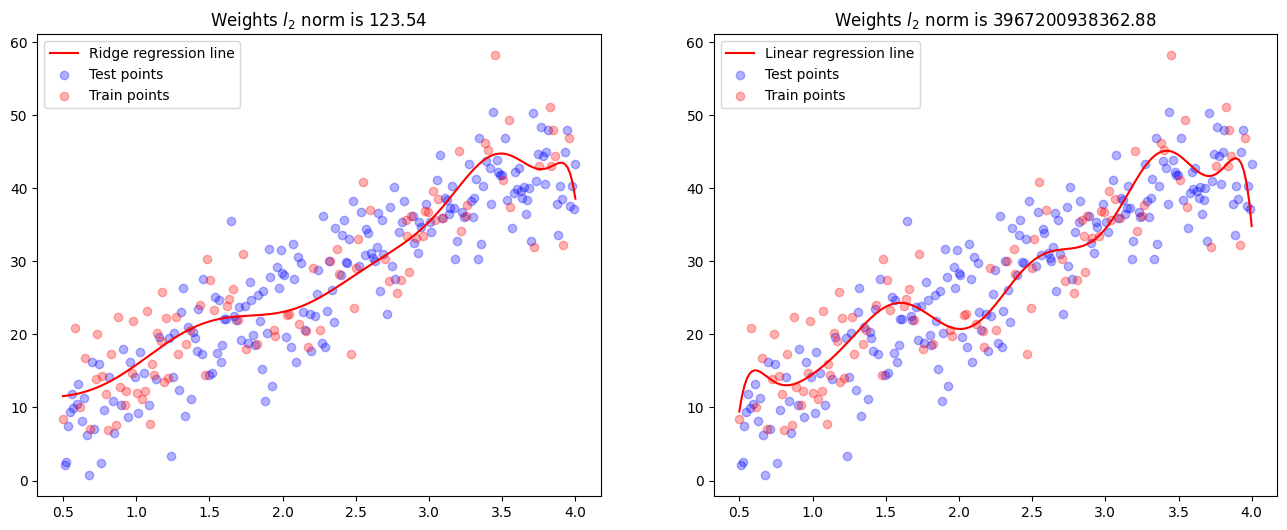

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

reg = Ridge(alpha = logspace[15], fit_intercept=True)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)
w_norm_ridge = np.round(np.sum(reg.coef_**2), 2)

ax[0].plot(np.linspace(0.5,4,200), y_pred_linspace,c='r',label='Ridge regression line')
ax[0].scatter(X_test, y_test, alpha=.3, c='b', label='Test points');
ax[0].set_title(f'Weights $l_2$ norm is {w_norm_ridge}')
ax[0].scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
ax[0].legend()

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_poly, y_train)
y_pred_linspace = reg.predict(X_linspace_poly)
w_norm_lr = np.round(np.sum(reg.coef_**2), 2)

ax[1].set_title(f'Weights $l_2$ norm is {w_norm_lr}')
ax[1].plot(np.linspace(0.5,4,200), y_pred_linspace,c='r', label='Linear regression line')
ax[1].scatter(X_test, y_test, alpha=.3,c='b', label='Test points');
ax[1].scatter(X_train, y_train, alpha=.3, c='r', label='Train points');
ax[1].legend()

plt.show()